### Guidance
This script will
- constrain MCM and GEOS-Chem mechanism
- constrain the customized GEOS-Chem mechanism 

Version updates:

20230323, Comparing to v5, we added the MCM VOCs into the GEOS-Chem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path

 
# Changing the CWD
os.chdir('/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_helper')
from data_processing import *
from Plotting_helper import *

In [2]:
# Read compounds and each flight dataframe
Flight_IDs   = ['RF03', 'RF07', 'RF09', 'FN19','P-3B']


In [3]:
# diff calcualiton 
diff_set = 'median'
#diff_set = 'mean'
# setting for smk or bkg
get_smk, get_smk_dil, get_smk_conorm = True, False, False
get_smk, get_smk_dil, get_smk_conorm = False, True, False
#get_smk, get_smk_dil, get_smk_conorm = False, False, True
# setting up postfic name
if get_smk:         postfix = 'smk'
if get_smk_dil:     postfix = 'smk_dil'
if get_smk_conorm:  postfix = 'smk_conorm'

In [4]:
# ============================
# from WE-CAN_processed_inputs
# ============================
def kdil(conc_smk, conc_bkg, time):
    # kdil calculation using trace gas X decay and inversion of dilution equation
    # dX/dt = -kdil*(X - Xb)
    dXdt = np.diff(conc_smk)/np.diff(60*time) # loss rate, sec
    dXdt = np.append(dXdt,dXdt[-1]) # extend the lenght to same length
    res = -np.array(dXdt)/(np.array(conc_smk)-conc_bkg)
    '''
    # similar calculation for tgauss
    # dX/dt = (-1/(tgauss + 2t))*(X - Xb)
    #tgauss1 = 1/kdil1 - 2*df.index*60 # doesn't work
    '''
    return res

#### Check for multiple compounds

In [5]:
compounds = [
    'Formaldehyde', 'Acetaldehyde', 'Lumped C>=3 aldehydes',
    'Glyoxal', 'Methylglyoxal', 
    'Formic acid',  'Acetic acid',
    'Methacrolein', 'MVK',
    'Acetone', 'MEK', 'Glycoaldehyde',
    'Hydroxyacetone', 
    'Phenol', 'Benzaldehyde', 
    'Furanone', 'Maleic anhydride', 
    'Acrolein', 'Butadiene',  'Butanedione', 
    'Pentan2one', 'Pentan3one', 'Catechol', 'Guaiacol',
    'Tolualdehyde',  
    'Pinic acid', 'Pinonic acid', 
] 
print(len(compounds))

27


In [6]:
get_smk_dil

True

Ethyne
RF03
RF07
RF09
FN19
Ethene
RF03
RF07
RF09
FN19
Lumped C>=3 alkenes
RF03
Difference for Lumped C>=3 alkenes between MCM + GEOS-Chem VOCs and GEOS-Chem (base): 2.2 ppb (Mean Absolute Difference), 22% (Mean Relative Difference)
Difference for Lumped C>=3 alkenes between MCM + FUR and GEOS-Chem (base): 3.7 ppb (Mean Absolute Difference), 37% (Mean Relative Difference)
Difference for Lumped C>=3 alkenes between MCM + FUR and MCM + GEOS-Chem VOCs: 1.5 ppb (Mean Absolute Difference), 12% (Mean Relative Difference)
RF07
Difference for Lumped C>=3 alkenes between MCM + GEOS-Chem VOCs and GEOS-Chem (base): 1.8 ppb (Mean Absolute Difference), 11% (Mean Relative Difference)
Difference for Lumped C>=3 alkenes between MCM + FUR and GEOS-Chem (base): 3.3 ppb (Mean Absolute Difference), 21% (Mean Relative Difference)
RF09
Difference for Lumped C>=3 alkenes between MCM + GEOS-Chem VOCs and GEOS-Chem (base): 1.1 ppb (Mean Absolute Difference), 14% (Mean Relative Difference)
Difference for Lumped 

/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_helper/data_processing.py:311: RuntimeWarning: invalid value encountered in double_scalars
  relative_diff_mean = (np.nanmean(df_model1) -  np.nanmean(df_model2))/ np.nanmean(df_model2) * 100
/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_helper/data_processing.py:311: RuntimeWarning: divide by zero encountered in double_scalars
  relative_diff_mean = (np.nanmean(df_model1) -  np.nanmean(df_model2))/ np.nanmean(df_model2) * 100


Model bias in MCM + FUR for Furans: -1.3 ppb (Mean Absolute Difference), -30% (Mean Relative Difference)
RF09
Model bias in MCM + FUR for Furans: -0.5 ppb (Mean Absolute Difference), -13% (Mean Relative Difference)
FN19
Model bias in MCM + FUR for Furans: -2.5 ppb (Mean Absolute Difference), -40% (Mean Relative Difference)
Furfurals
RF03
RF07
Model bias in MCM + FUR for Furfurals: -0.6 ppb (Mean Absolute Difference), -20% (Mean Relative Difference)
RF09
FN19
Model bias in MCM + FUR for Furfurals: -1.0 ppb (Mean Absolute Difference), -17% (Mean Relative Difference)
Furan
RF03
Model bias in MCM + FUR for Furan: -0.7 ppb (Mean Absolute Difference), -20% (Mean Relative Difference)
RF07
Model bias in MCM + FUR for Furan: -0.5 ppb (Mean Absolute Difference), -19% (Mean Relative Difference)
RF09
FN19
Model bias in MCM + FUR for Furan: -1.2 ppb (Mean Absolute Difference), -33% (Mean Relative Difference)
Methylfuran
RF03
Model bias in MCM + FUR for Methylfuran: -0.4 ppb (Mean Absolute Differenc

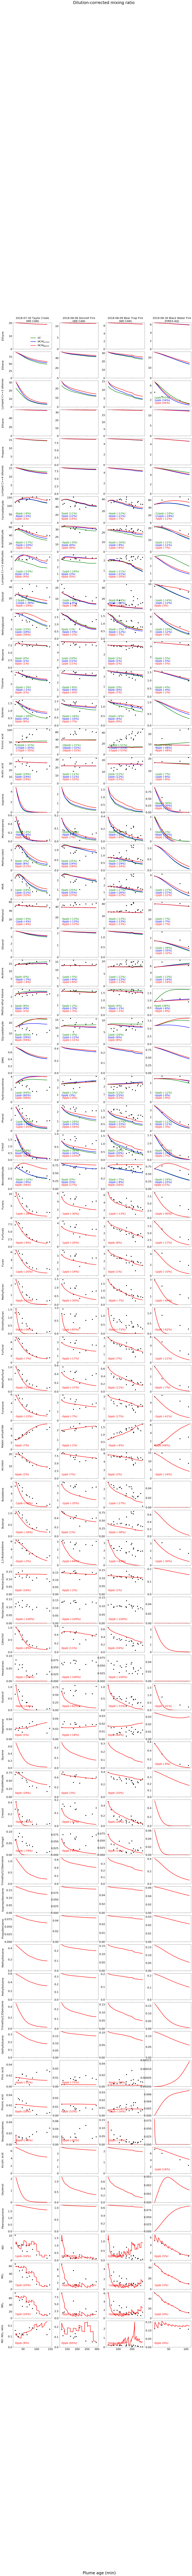

In [7]:
# ------------------------
# Set up needed  compounds 
# ------------------------
# All
compounds = [
    'Ethyne', 
    'Ethene', 'Lumped C>=3 alkenes',
    'Ethane', 'Propane', 'Lumped C>=4 alkanes', 
    'Formaldehyde', 'Acetaldehyde', 'Lumped C>=3 aldehydes',
    'Glyoxal', 'Methylglyoxal', 'Benzene', 'Toluene', 'Xylenes',
    'Formic acid',  'Acetic acid',
    'Isoprene', 'Monoterpenes', 'Methacrolein', 'MVK',
    'Methanol', 'Ethanol',
    'Acetone', 'MEK', 'Glycoaldehyde',
    'DMS', 'Hydroxyacetone', 
    'Phenol', 'Cresol', 'Benzaldehyde', 
    'Furans', 'Furfurals', # other VOCs,
    'Furan', 'Methylfuran', 'Dimethylfuran', 'Furfural', 'Methylfurfural',
    'Furanone', 'Maleic anhydride', 
    'Acrolein', 'Butadiene', 'Butenal', 'Butanedione', 
    'Pentan2one', 'Pentan3one', 'Catechol', 'Hexanones', 'Guaiacol', 'Heptanone',
    'Styrene', 'Tolualdehyde', 'Creosol', 'Syringol', 
    'Trimethyl123benzene', 'Isopropylbenzene', 'Propylbenzene', 'Methyltoluene', 
    'Pethyltoluene', 'Trimethyl135benzene', 'Oethyltoluene', 
    'Pinic acid', 'Pinonic acid', 'Sesquiterpenes', 'Acrylic acid', 
    'Oxylenol', 'Pbenzoquinone', 'NO', 'NO2', 'NOx', 'NONO2Ratio',
] 

#compounds = ['Furan', 'Monoterpenes', 'Dimethylfuran', 'Sesquiterpenes']
#compounds = ['Furan', 'Formaldehyde']
#compounds = [
#    'Furans', 'Furfurals', # other VOCs,
#]

'''
# delete those inert compounds
compounds = [
    'Lumped C>=3 alkenes','Xylenes', 'Isoprene', 'Monoterpenes', 'Cresol',
    #'Furans', 'Furfurals', # other VOCs,
    'Furan', 'Methylfuran', 'Dimethylfuran', 'Furfural', 'Methylfurfural',
    'Butenal', 'Styrene', 'Creosol', 'Syringol', 'Sesquiterpenes',
    'Formaldehyde', 'Acetaldehyde', 'Lumped C>=3 aldehydes',
    'Glyoxal', 'Methylglyoxal', 
    'Formic acid',  'Acetic acid',
    'Methacrolein', 'MVK',
    'Acetone', 'MEK', 'Glycoaldehyde',
    'Hydroxyacetone', 
    'Phenol', 'Benzaldehyde', 
    'Furanone', 'Maleic anhydride', 
    'Acrolein', 'Butadiene',  'Butanedione', 
    'Pentan2one', 'Pentan3one', 'Catechol', 'Guaiacol',
    'Tolualdehyde',  
    'Pinic acid', 'Pinonic acid', 
] 
compounds = [
    'Formaldehyde', 'Acetaldehyde', 'Lumped C>=3 aldehydes',
    'Glyoxal', 'Methylglyoxal', 
    'Formic acid',  'Acetic acid',
    'Methacrolein', 'MVK',
    'Acetone', 'MEK', 'Glycoaldehyde',
    'Hydroxyacetone', 
    'Phenol', 'Benzaldehyde', 
    'Furanone', 'Maleic anhydride', 
    'Acrolein', 'Butadiene',  'Butanedione', 'Guaiacol',
    #'Pentan2one', 'Pentan3one', 'Catechol',
    #'Tolualdehyde',  
    #'Pinic acid', 'Pinonic acid', 
] 
'''
#compounds = ['Formic acid', 'Lumped C>=3 aldehydes','Glyoxal', 'Methylglyoxal', 'MEK', 'Benzaldehyde' ]


# Primary VOCs
#compounds = ['Methylfuran', 'Dimethylfuran', 'Guaiacol', 'Creosol', 'Syringol', 'Sesquiterpenes']
#compounds = ['Formic acid', 'Acetic acid']

# Read compounds and each flight dataframe
Flight_IDs   = ['RF03', 'RF07', 'RF09', 'FN19', 'P-3B']
Flight_IDs   = ['RF03', 'RF07', 'RF09', 'FN19']
# -----------------------
# plotting for the figure
# -----------------------
linewidth = 3
error_infor = False
fontsize_flight = 20
fontsize_tick   = 20
fontsize_lable  = 18
fontsize_comp   = 20# this is for y lable

# colors for model
colors = ['green', 'purple', 'orange', \
          'red', 'blue']

# Initialize dictionaries to hold relative errors
relative_errors_gc = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}
relative_errors_mcm_gcvoc = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}
relative_errors_mcm_fur = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}
relative_errors_mcm_gc = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}
relative_errors_mcm_fur_gc = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}
relative_errors_mcm_fur_gcvoc = {flight: {compound: None for compound in compounds} for flight in Flight_IDs}

# Create an empty DataFrame with Flight IDs as the index
df_relative_errors = pd.DataFrame(index=Flight_IDs)

# Subplots 
fig, axes = plt.subplots(len(compounds), len(Flight_IDs), 
                         figsize=(6*len(Flight_IDs), 4*len(compounds)),
                         sharex='col')
for row, compound in enumerate(compounds):
    print(compound)
    for col, Flight_ID in enumerate(Flight_IDs):
        print(Flight_ID)
        shaded_uncertainty = name2uncertainty.get(compound, 0)
        # ------------
        # Reading data
        # ------------
        # Auto change for each flight ID
        if Flight_ID in ['RF03', 'RF07', 'RF09']: file_prefix  = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/WE-CAN/Dataprocess/analysis_bycompound/'
        if Flight_ID in ['FN19']: file_prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/FIREX-AQ/Dataprocess/analysis_bycompound/'
        if Flight_ID in ['P-3B']: file_prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/P-3B/Dataprocess/analysis_bycompound/'
        file_obs = f'{file_prefix}{compound.replace(" ", "_")}/{Flight_ID}_obs_{postfix}.csv'
        path = Path(file_obs)

        # Read in data
        if path.is_file():
            df_compound_obs = pd.read_csv(file_obs, index_col=0)
            df_compound_obs.index.name='Avg_physical_age_min'
        else:
            df_dummy = pd.read_csv(f'{file_prefix}O3/{Flight_ID}_obs_{postfix}.csv', index_col=0)
            df_compound_obs = pd.DataFrame(0, index=df_dummy.index, columns = ['Observation'])
        # Reading model
        if compound != 'ROx':
            df_compound_mod = pd.read_csv(f"{file_prefix}{compound.replace(' ', '_')}/{Flight_ID}_mod_{postfix}.csv", index_col=0)
            df_compound_mod.index.name='Avg_physical_age_min'             
        else:
            df_compound_mod_HO2 = pd.read_csv(f"{file_prefix}HO2/{Flight_ID}_mod_{postfix}.csv", index_col=0)
            df_compound_mod_RO2 = pd.read_csv(f"{file_prefix}TRO2/{Flight_ID}_mod_{postfix}.csv", index_col=0)
            df_compound_mod = df_compound_mod_HO2 + df_compound_mod_RO2
            df_compound_mod.index.name='Avg_physical_age_min'
        # --------
        # Plotting
        # --------
        if path.is_file() and df_compound_obs['Observation'].values[0] != 0:
            # polinomial regression line
            # train the model based on observation data
            idx = np.isfinite(df_compound_obs.index) & np.isfinite(df_compound_obs['Observation'])         # only pass datapoint with values
            coefs = np.polyfit(df_compound_obs.index[idx], df_compound_obs['Observation'][idx], 2)
            poly_model = np.poly1d(coefs)
            
            # plotting the scatter
            axes[row, col].scatter(df_compound_obs.index, df_compound_obs['Observation'], label = '$Obs$', color = 'black')

        # edit part    
        if compound in ['OH', 'HO2', 'HOx', 'TRO2', 'ROx']: df_compound_mod = df_compound_mod*2.46*1e10
        
        # MCM
        if compound in Comps_in_GC:
            axes[row, col].plot(df_compound_mod.index, df_compound_mod['GEOS-Chem (base)'],\
                                color=colors[0],  label='$GC$', linewidth=linewidth)
            axes[row, col].plot(df_compound_mod.index, df_compound_mod['MCM + GEOS-Chem VOCs'], \
                                color=colors[4],  label='$MCM_{GCVOC}$', linewidth=linewidth)
        else:
            axes[row, col].plot(df_compound_mod.index, [np.nan]*len(df_compound_mod),\
                                color=colors[0],  label='$GC$', linewidth=linewidth)
            axes[row, col].plot(df_compound_mod.index, [np.nan]*len(df_compound_mod), \
                                color=colors[4],  label='$MCM_{GCVOC}$', linewidth=linewidth)
        axes[row, col].plot(df_compound_mod.index, df_compound_mod['MCM + FUR'], \
                            color=colors[3],  label='$MCM_{BBVOC}$', linewidth=linewidth) 
        
        # ------------
        # Plot setting
        # ------------
        # set up the row
        if row == 0: axes[row, col].set_title(id2fire_name[Flight_ID], loc ='center', size=fontsize_flight)

        # Set the y-axis to start from 0
        axes[row, col].set_ylim(bottom=0)  # This will ensure the y-axis starts at 0
            
        # y label 
        if col == 0: axes[row, col].set_ylabel(text_ysublabels.get(compound, compound), size=fontsize_comp)
                
        # Spacing Out
        plt.subplots_adjust(wspace=.20, hspace=.10)
        axes[row, col].tick_params(axis='both', labelsize=fontsize_tick)
        
        # Display labels in the figure
        if (row, col) == (0, 0):
            font = font_manager.FontProperties(size=fontsize_lable, weight='semibold')
            # edit part
            handles, labels= reorderLegend(axes[row, col],['$Obs$', \
                                                           #'$Obs, fitted$', \
                                                           '$GC$', '$MCM_{GCVOC}$', '$MCM_{BBVOC}$'])
            axes[row, col].legend(loc="lower right", prop=font, handles= handles, labels=labels)

        # edit part, uncomment when we compare MCM+Furan and MCM, with CTM VOCs
        # get the range for the x/y axis
        xmin, xmax = axes[row, col].get_xlim()
        ymin, ymax = axes[row, col].get_ylim()
        
        # Model evaluations
        if path.is_file() and df_compound_obs['Observation'].values[0] != 0:
            abs_diff_gc, relative_diff_gc = evaluate_model_differences(df_compound_obs, df_compound_mod['GEOS-Chem (base)'], poly_model, 'GEOS-Chem (base)', compound)
            abs_diff_mcm_gcvoc, relative_diff_mcm_gcvoc = evaluate_model_differences(df_compound_obs, df_compound_mod['MCM + GEOS-Chem VOCs'], poly_model, 'MCM + GEOS-Chem VOCs', compound)
            abs_diff_mcm_fur, relative_diff_mcm_fur = evaluate_model_differences(df_compound_obs, df_compound_mod['MCM + FUR'], poly_model, 'MCM + FUR', compound)

            diff_str_gc        = '{:.0f}'.format(abs_diff_gc) + 'ppb (' + '{:.0f}'.format(relative_diff_gc) +'%)'
            diff_str_mcm_gcvoc = '{:.0f}'.format(abs_diff_mcm_gcvoc) + 'ppb (' + '{:.0f}'.format(relative_diff_mcm_gcvoc) +'%)'
            diff_mcm_fur       = '{:.0f}'.format(abs_diff_mcm_fur) + 'ppb (' + '{:.0f}'.format(relative_diff_mcm_fur) +'%)'
            if compound in Comps_in_GC:
                axes[row, col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.32+ymin, diff_str_gc, fontsize=fontsize_tick, color = colors[0])  
                axes[row, col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.22+ymin, diff_str_mcm_gcvoc, fontsize=fontsize_tick, color = colors[4])  
            axes[row, col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.12+ymin, diff_mcm_fur, fontsize=fontsize_tick, color = colors[3])
        
            
        # Compare MCM with GEOS-Chem VOCs to GEOS-Chem (base)
        abs_diff_mcm_gc, relative_diff_mcm_gc = model_vs_model_evaluation(
            df_compound_mod['MCM + GEOS-Chem VOCs'],
            df_compound_mod['GEOS-Chem (base)'],
            'MCM + GEOS-Chem VOCs',
            'GEOS-Chem (base)',
            compound
        )

        # Compare MCM with FUR to GEOS-Chem (base)
        abs_diff_mcm_fur_gc, relative_diff_mcm_fur_gc = model_vs_model_evaluation(
            df_compound_mod['MCM + FUR'],
            df_compound_mod['GEOS-Chem (base)'],
            'MCM + FUR',
            'GEOS-Chem (base)',
            compound
        )

        # Optionally, you could also compare MCM with FUR to MCM with GEOS-Chem VOCs
        abs_diff_mcm_fur_gcvoc, relative_diff_mcm_fur_gcvoc = model_vs_model_evaluation(
            df_compound_mod['MCM + FUR'],
            df_compound_mod['MCM + GEOS-Chem VOCs'],
            'MCM + FUR',
            'MCM + GEOS-Chem VOCs',
            compound
        )
        
        
#  Align the first column of axes:
fig.align_ylabels(axes[:,0])

# Texts
unit='Molecule cm$^{-3}$' if compound in ['OH', 'HO2', 'HOx', 'TRO2', 'ROx'] else 'ppb'
if compound in ['NONO2Ratio']: unit = ''

if len(Flight_IDs) == 3: 
    fig.text(0.06,0.5, unit, ha="center", va="center", rotation=90, fontsize=30)
    fig.text(0.5,0.0, 'Plume age (min)', ha="center", va="bottom", fontsize=30)
    if get_smk:            fig.text(0.6,0.98, 'Mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_dil:        fig.text(0.52,0.98, 'Dilution-corrected mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_conorm:     fig.text(0.5,0.98, 'CO normalized value', ha="center", va="top", fontsize=30)

if len(Flight_IDs) == 4: 
    fig.text(0.06,0.5, unit, ha="center", va="center", rotation=90, fontsize=30)
    fig.text(0.5,0.04, 'Plume age (min)', ha="center", va="bottom", fontsize=30)
    if get_smk:            fig.text(0.6,1.0, 'Mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_dil:        fig.text(0.52,1.0, 'Dilution-corrected mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_conorm:     fig.text(0.5,1.0, 'CO normalized value', ha="center", va="top", fontsize=30)
    
if len(Flight_IDs) == 5: 
    fig.text(0.08,0.5, unit, ha="center", va="center", rotation=90, fontsize=30)
    fig.text(0.5,0.08, 'Plume age (min)', ha="center", va="bottom", fontsize=30)
    if get_smk:            fig.text(0.6,1.0, 'Mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_dil:        fig.text(0.52,0.95, 'Dilution-corrected mixing ratio', ha="center", va="top", fontsize=30)
    if get_smk_conorm:     fig.text(0.5,0.8, 'CO normalized value', ha="center", va="top", fontsize=30)
    
    
# Save the figure
prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/output/'
postfix_save = 'test'

'''
if get_smk:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_combine_{postfix_save}.png', format="png", bbox_inches='tight')
elif get_smk_dil:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_dil_combine_{postfix_save}.png', format="png", bbox_inches='tight')
elif get_smk_conorm:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_conorm_combine_{postfix_save}.png', format="png", bbox_inches='tight')
''' 
if get_smk:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_combine_{postfix_save}.pdf', format="pdf", bbox_inches='tight')
elif get_smk_dil:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_dil_combine_{postfix_save}.pdf', format="pdf", bbox_inches='tight')
elif get_smk_conorm:
    fig.savefig(f'{prefix}F0AM_mech_comp_TS_smk_conorm_combine_{postfix_save}.pdf', format="pdf", bbox_inches='tight')

In [8]:
print('done')

done


In [9]:
df_compound_mod

,GEOS-Chem (base),GEOS-Chem + FUR,MCM + FUR,MCM + GEOS-Chem VOCs,MCM + GEOS-Chem VOCs + FUR
Avg_physical_age_min,,,,,
9.670000,0.110735,0.110735,0.110735,0.110735,0.110735
9.670000,0.110735,0.110735,0.110735,0.110735,0.110735
9.670000,0.110735,0.110735,0.110735,0.110735,0.110735
9.670000,0.110735,0.110735,0.110735,0.110735,0.110735
9.670000,0.110735,0.110735,0.110735,0.110735,0.110735
...,...,...,...,...,...
106.040439,0.139835,0.119274,0.128386,0.150172,0.133497
107.040439,0.139231,0.118879,0.127896,0.149488,0.133028
108.040439,0.138650,0.118501,0.127426,0.148828,0.132575


#### Check for single compound, e.g., O3, PAN, and total VOCR
The only diff from script above: 
- delete varialbes related row
- modify things related to len(compounds)
- adding slope of the ozone trend

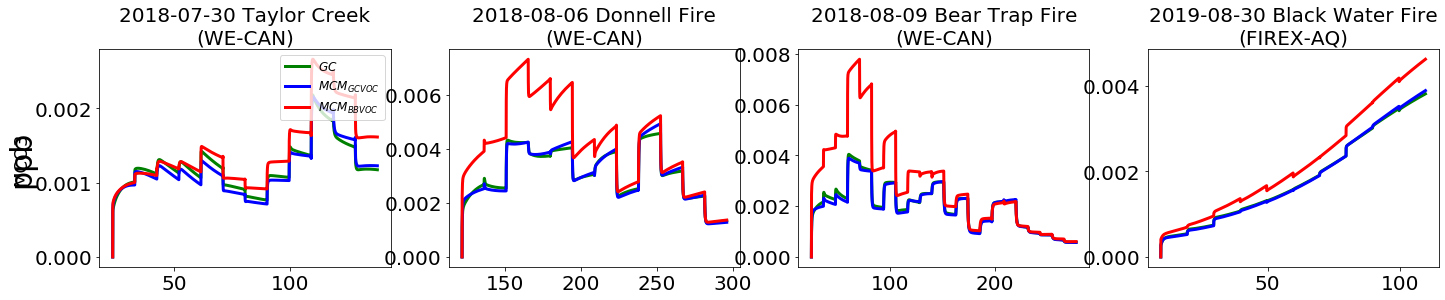

In [10]:
# diff calcualiton 
diff_set = 'median'
#diff_set = 'mean'

### Isoprene and MVK are okay


# HNO3 is only measured in WE-CAN
# PAN is measured in WE-CAN and FIREX-AQ

# plotting for the figure
linewidth = 3
error_infor = False
fontsize_flight = 20
fontsize_tick   = 20
fontsize_label  = 12
fontsize_comp   = 18

# colors for model
#colors = ['green', 'orange', 'purple', \
#          'red', 'blue']
colors = ['green', 'purple', 'orange', \
          'red', 'blue']

compound = 'O3'
#compound = 'CO'
#compound = 'Isoprene'
#compound = 'PAN'
compound = 'NOx'
compound = 'TVOCR'
#compound = 'Glyoxal'
#compound = 'Formic acid'
compound = 'PAN'
compound = 'MCO3'
postfix = 'smk'

# subplots 
fig, axes = plt.subplots(1, len(Flight_IDs), 
                         figsize=(6*len(Flight_IDs), 4),
                         sharex='col')
for col, Flight_ID in enumerate(Flight_IDs):
    shaded_uncertainty = name2uncertainty.get(compound, 0.15)
    # auto change for each flight ID
    if Flight_ID in ['RF03', 'RF07', 'RF09']: file_prefix  = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/WE-CAN/Dataprocess/analysis_bycompound/'
    if Flight_ID in ['FN19']: file_prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/FIREX-AQ/Dataprocess/analysis_bycompound/'
    if Flight_ID in ['P-3B']: file_prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/P-3B/Dataprocess/analysis_bycompound/'
    file_obs = file_prefix + compound.replace(' ', '_') + '/'+ Flight_ID + '_obs_' + postfix +'.csv'
    path = Path(file_obs)

    # read in data
    if path.is_file():
        df_compound_obs = pd.read_csv(file_obs, index_col=0)
        df_compound_obs.index.name='Avg_physical_age_min'
    else:
        df_dummy = pd.read_csv(file_prefix + 'O3' + '/'+ Flight_ID + '_obs_' + postfix +'.csv', index_col=0)
        df_compound_obs = pd.DataFrame(0, index=df_dummy.index, columns = ['Observation'])

    # remove the outliner for WE-CAN RF03
    if col == 1: df_compound_obs = df_compound_obs.iloc[df_compound_obs.index != 124.7217351]
             
    # reading model
    df_compound_mod = pd.read_csv(file_prefix + compound.replace(' ', '_') + '/'+ Flight_ID + '_mod_' + postfix +'.csv', index_col=0)
    df_compound_mod.index.name='Avg_physical_age_min'

    if path.is_file() and df_compound_obs['Observation'].values[0] != 0:
        # polinomial regression line
        # train the model based on observation data
        idx = np.isfinite(df_compound_obs.index) & np.isfinite(df_compound_obs['Observation'])         # only pass datapoint with values
        coefs = np.polyfit(df_compound_obs.index[idx], df_compound_obs['Observation'][idx], 2) # 3 may be the best fit
        poly_model = np.poly1d(coefs)

        # plotting scatters
        axes[col].scatter(df_compound_obs.index, df_compound_obs['Observation'], label = '$Obs$', color = 'black')

        # plotting the line of best fit
        #axes[col].plot(df_compound_mod.index, poly_model(df_compound_mod.index), \
        #                    color='black', label = '$Obs, fitted$', linewidth=linewidth)
        #axes[col].fill_between(df_compound_mod.index, poly_model(df_compound_mod.index)*(1-shaded_uncertainty), poly_model(df_compound_mod.index)*(1+shaded_uncertainty), color='black',
        #                     alpha=0.2)

    # edit part    
    if compound in ['OH']: df_compound_mod = df_compound_mod*2.46*1e10

    # MCM
    axes[col].plot(df_compound_mod.index, df_compound_mod['GEOS-Chem (base)'],\
                        color=colors[0],  label='$GC$', linewidth=linewidth)
    axes[col].plot(df_compound_mod.index, df_compound_mod['MCM + GEOS-Chem VOCs'], \
                        color=colors[4],  label='$MCM_{GCVOC}$', linewidth=linewidth)  
    axes[col].plot(df_compound_mod.index, df_compound_mod['MCM + FUR'], \
                        color=colors[3],  label='$MCM_{BBVOC}$', linewidth=linewidth) 

    # set up the row
    axes[col].set_title(id2fire_name[Flight_ID], loc ='center', size=fontsize_flight)

    # y label 
    if col == 0:  axes[col].set_ylabel(text_ysublabels.get(compound, compound), size=fontsize_comp)

    # Spacing Out
    plt.subplots_adjust(wspace=.20, hspace=.10)
    axes[col].tick_params(axis='both', labelsize=fontsize_tick)

    # Display labels in the figure
    if col == 0:
        font = font_manager.FontProperties(size=fontsize_label, weight='semibold')
        # edit part
        handles, labels= reorderLegend(axes[col],['$Obs$', '$Obs, fitted$', \
                                                  '$GC$', '$MCM_{GCVOC}$', '$MCM_{BBVOC}$'])
        axes[col].legend(loc="upper right", prop=font, handles= handles, labels=labels)

    # Texts
    if get_smk_dil==True: title_text = 'Dilution-corrected mixing ratio'
    if get_smk ==True: title_text = 'Mixing ratio'

    if len(Flight_IDs) == 3 and col == 1:
        t = plt.text(0.55,1.4, title_text, transform=axes[col].transAxes,horizontalalignment='center', verticalalignment='top', fontsize=35)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
    if len(Flight_IDs) == 5 and col == 2:
        t = plt.text(0.65,1.4, title_text, transform=axes[col].transAxes,horizontalalignment='center', verticalalignment='top', fontsize=35)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
    if len(Flight_IDs) == 3 and col == 1:
        t = plt.text(0.45,-0.3, 'Plume age (min)', transform=axes[col].transAxes,horizontalalignment='center', verticalalignment='bottom', fontsize=30)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
    if len(Flight_IDs) == 5 and col == 2:
        t = plt.text(0.55,-0.3, 'Plume age (min)', transform=axes[col].transAxes,horizontalalignment='center', verticalalignment='bottom', fontsize=30)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

    # edit part, uncomment when we compare MCM+Furan and MCM, with CTM VOCs
    # get the range for the x/y axis
    xmin, xmax = axes[col].get_xlim()
    ymin, ymax = axes[col].get_ylim()

    # Model evaluations
    if path.is_file() and df_compound_obs['Observation'].values[0] != 0:
        abs_diff_gc, relative_diff_gc = evaluate_model_differences(df_compound_obs, df_compound_mod['GEOS-Chem (base)'], poly_model, 'GEOS-Chem (base)', compound)
        abs_diff_mcm_gcvoc, relative_diff_mcm_gcvoc = evaluate_model_differences(df_compound_obs, df_compound_mod['MCM + GEOS-Chem VOCs'], poly_model, 'MCM + GEOS-Chem VOCs', compound)
        abs_diff_mcm_fur, relative_diff_mcm_fur = evaluate_model_differences(df_compound_obs, df_compound_mod['MCM + FUR'], poly_model, 'MCM + FUR', compound)

        diff_str_gc        = '{:.0f}'.format(abs_diff_gc) + 'ppb (' + '{:.0f}'.format(relative_diff_gc) +'%)'
        diff_str_mcm_gcvoc = '{:.0f}'.format(abs_diff_mcm_gcvoc) + 'ppb (' + '{:.0f}'.format(relative_diff_mcm_gcvoc) +'%)'
        diff_mcm_fur       = '{:.0f}'.format(abs_diff_mcm_fur) + 'ppb (' + '{:.0f}'.format(relative_diff_mcm_fur) +'%)'
        if compound in Comps_in_GC:
            axes[col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.32+ymin, diff_str_gc, fontsize=fontsize_tick, color = colors[0])  
            axes[col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.22+ymin, diff_str_mcm_gcvoc, fontsize=fontsize_tick, color = colors[4])  
        axes[col].text((xmax-xmin)*0.05+xmin, (ymax-ymin)*0.12+ymin, diff_mcm_fur, fontsize=fontsize_tick, color = colors[3])


    # Compare MCM with GEOS-Chem VOCs to GEOS-Chem (base)
    abs_diff_mcm_gc, relative_diff_mcm_gc = model_vs_model_evaluation(
        df_compound_mod['MCM + GEOS-Chem VOCs'],
        df_compound_mod['GEOS-Chem (base)'],
        'MCM + GEOS-Chem VOCs',
        'GEOS-Chem (base)',
        compound
    )

    # Compare MCM with FUR to GEOS-Chem (base)
    abs_diff_mcm_fur_gc, relative_diff_mcm_fur_gc = model_vs_model_evaluation(
        df_compound_mod['MCM + FUR'],
        df_compound_mod['GEOS-Chem (base)'],
        'MCM + FUR',
        'GEOS-Chem (base)',
        compound
    )

    # Optionally, you could also compare MCM with FUR to MCM with GEOS-Chem VOCs
    abs_diff_mcm_fur_gcvoc, relative_diff_mcm_fur_gcvoc = model_vs_model_evaluation(
        df_compound_mod['MCM + FUR'],
        df_compound_mod['MCM + GEOS-Chem VOCs'],
        'MCM + FUR',
        'MCM + GEOS-Chem VOCs',
        compound
    )
        
#  Align the first column of axes:
fig.align_ylabels(axes[0])

# Texts
unit = 'ppb'

if 'OH' == compound: unit = 'molecule cm$^{-3}$'
if 'Total VOCR' == compound: unit= 's$^{-1}$'
#fig.text(0.04,0.5, unit, ha="center", va="center", rotation=90, fontsize=30)
fig.text(0.08,0.5, unit, ha="center", va="center", rotation=90, fontsize=30)
#fig.text(0.32,0.90, 'CO normalized reactive nitrogen and O$_{3}$ mixing ratios', fontsize=35)

# Save the figure
prefix = '/glade/work/lixujin/PYTHON/SciProj/Box_modeling_analysis/F0AM_analysis_TS/output/'
if 'Formaldehyde' == compound : postfix_save = 'VOCs'
if 'NOx' == compound: postfix_save = 'ReactiveN'
if 'HOx' == compound: postfix_save = 'Radicals'
if 'Ethane' == compound: postfix_save = 'PrimaryVOCs'
if 'Total VOCR' == compound: postfix_save = 'TVOCR'
if get_smk == True:
    fig.savefig(prefix + 'F0AM_mech_comp_TS_smk_combine_' + postfix_save + '.pdf', format="pdf", bbox_inches='tight') 
elif get_smk_dil == True:
    fig.savefig(prefix + 'F0AM_mech_comp_TS_smk_dil_combine_' + postfix_save + '.pdf', format="pdf", bbox_inches='tight') 